---
# Size response curves

In [1]:
%reload_ext autoreload
%autoreload 2

In [10]:
import numpy as np
from prfpy import *
from linescanning import *
from linescanning import prf,utils
from scipy.io import loadmat
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')

opj = os.path.join
base, place = utils.get_base_dir()

base_dir = opj(base, 'projects', 'hemifield')
fig_dir = opj(base_dir, 'code', 'figures', 'prf')


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.2s finished


sub-001: [ 1.785 -2.457  0.234  2.45  -0.124  0.01  18.     2.45  10.     0.78 ]
use following stimulus sizes: [0.36, 0.57, 0.64, 0.71, 1.0]


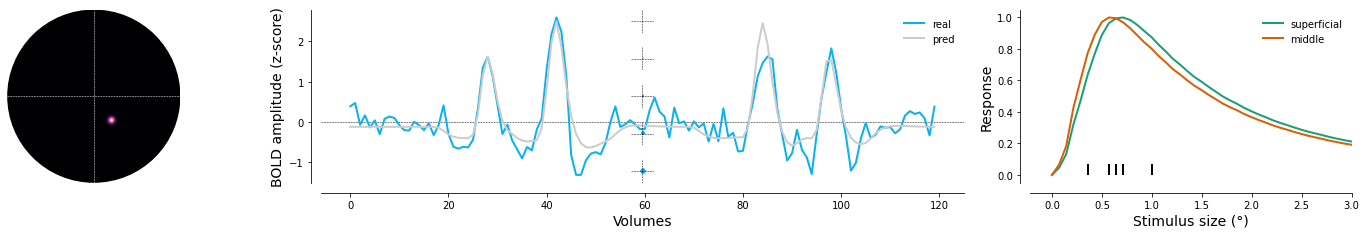

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s finished


sub-002: [ 1.08  -1.487  0.707  3.893 -0.056  0.1    8.     3.893 10.     0.672]
use following stimulus sizes: [0.54, 0.94, 1.04, 1.07, 2.01]


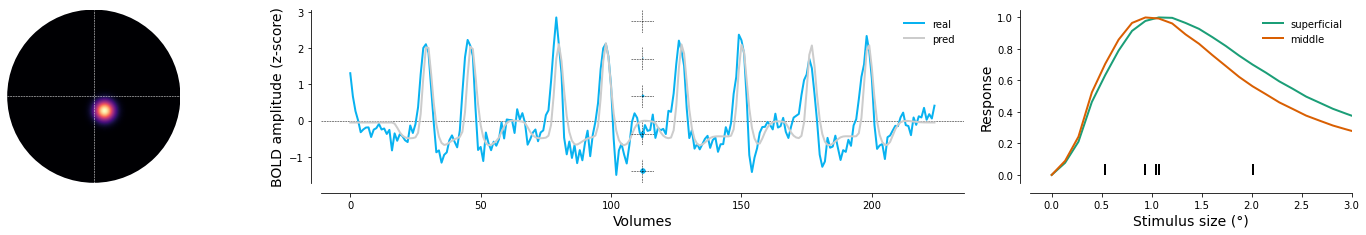

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s finished


sub-003: [ 0.742 -2.283  0.439  0.264 -0.117  0.01   5.     0.264 10.     0.252]
use following stimulus sizes: [0.57, 0.93, 0.98, 1.07, 1.57]


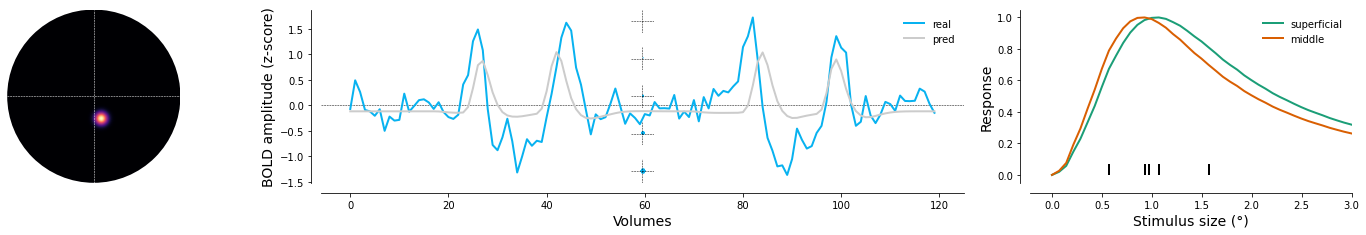

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s finished


sub-004: [ 0.794 -1.092  1.039  0.195 -0.16   0.01  18.     0.195  1.     0.715]
use following stimulus sizes: [0.67, 1.21, 1.27, 1.34, 2.81]


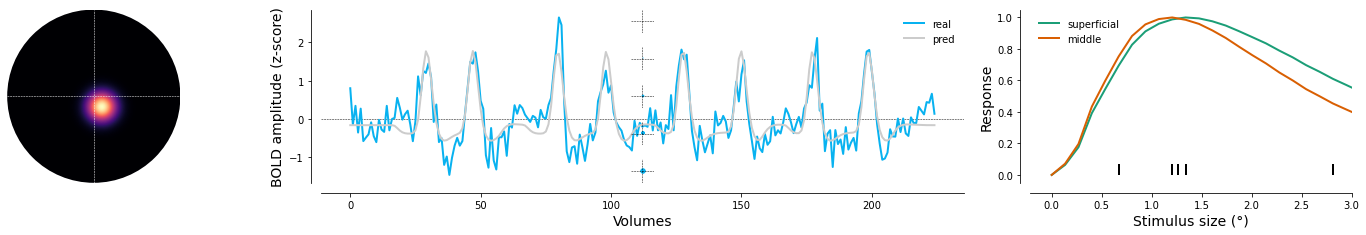

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s finished


sub-005: [ 2.283 -0.742  1.039  0.189 -0.163  0.01  18.     0.189  1.     0.745]
use following stimulus sizes: [0.67, 1.21, 1.27, 1.34, 2.81]


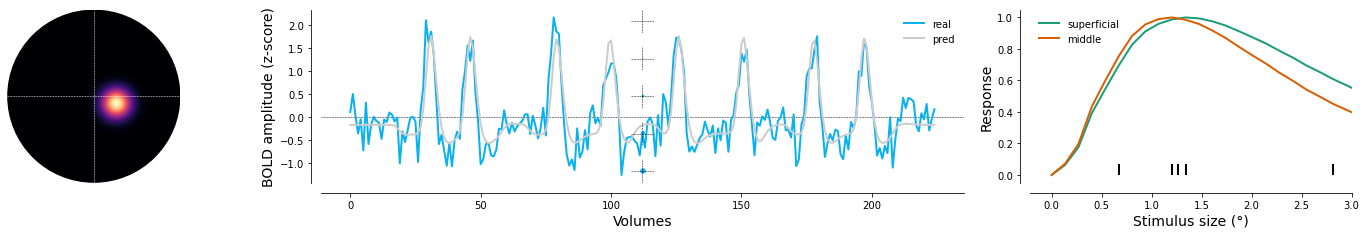

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s finished


sub-006: [ 0.551 -0.758  0.234  3.112 -0.035  0.01  18.     3.112 10.     0.566]
use following stimulus sizes: [0.4, 0.67, 0.77, 0.8, 1.21]


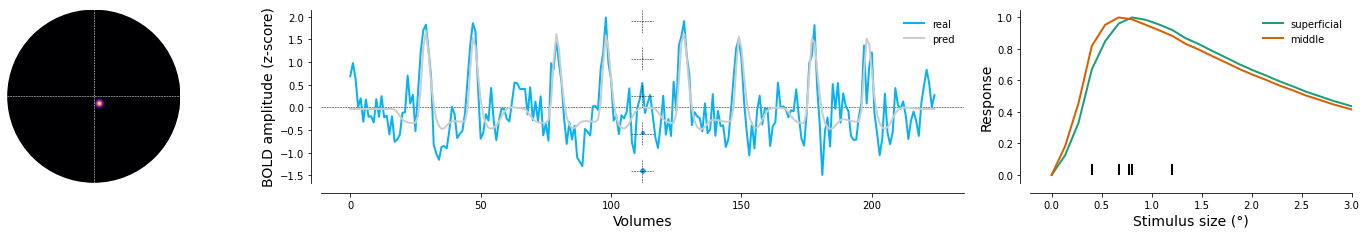

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s finished


sub-007: [ 1.092 -0.794  1.039  0.197 -0.162  0.01  18.     0.197  1.     0.725]
use following stimulus sizes: [0.67, 1.21, 1.27, 1.34, 2.81]


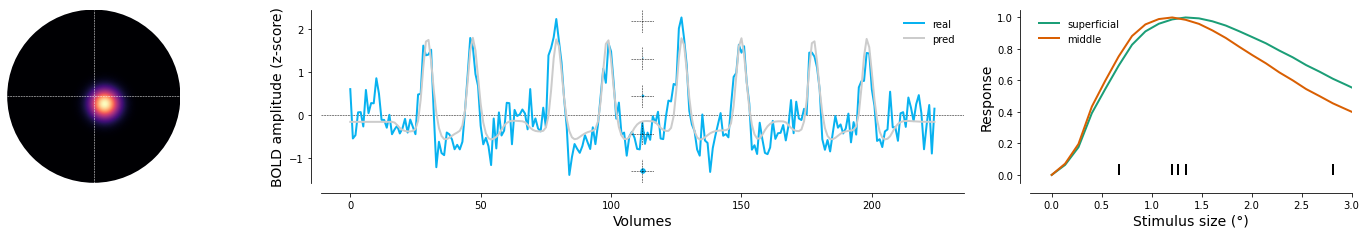

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished


sub-008: [ 1.942 -1.411  1.039  2.271 -0.195  0.1   18.     2.271 10.     0.74 ]
use following stimulus sizes: [0.67, 1.21, 1.29, 1.34, 2.81]


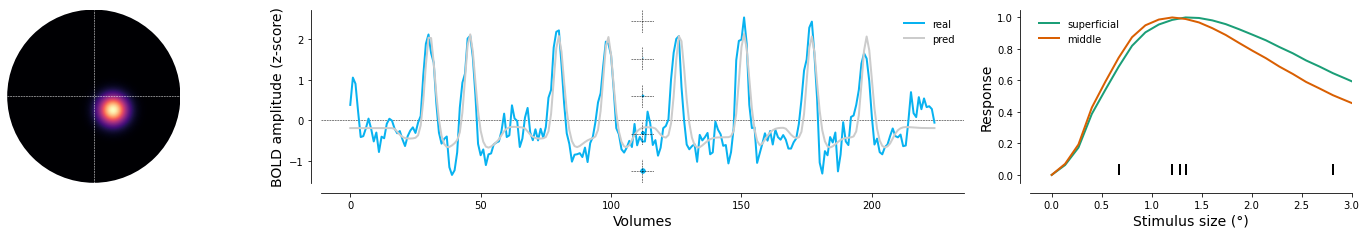

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s finished


sub-009: [ 1.942 -1.411  1.039  0.226 -0.171  0.01  18.     0.226  1.     0.678]
use following stimulus sizes: [0.67, 1.21, 1.27, 1.34, 2.81]


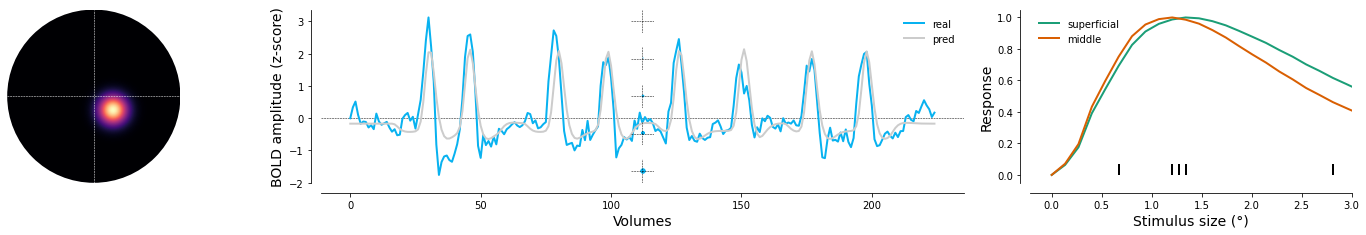

In [64]:
# general settings
subj_list = ['sub-001', 'sub-002', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-009']
# subj_list = ['sub-005'] #, 'sub-006']
hemi = "lh"

# initiate figure
nr = len(subj_list)

gs1 = gridspec.GridSpec(nr,3)
line_width = 2

# prf settings
vf_extent = [-5, 5]

plot_counter = 0
for idx,subject in enumerate(subj_list):

    fig = plt.figure(constrained_layout=True, figsize=(20,5))
    gs00 = fig.add_gridspec(1,3, width_ratios=[10,20,10])
    gs01 = fig.add_gridspec(5,1)

    if hemi == "lh":
        hemi_tag = "hemi-L"
    elif hemi == "rh":
        hemi_tag = "hemi-R"

    # load design matrix
    design_fn = utils.get_file_from_substring("vis_design.mat", opj(base_dir, 'derivatives', 'prf', subject))
    design_matrix = loadmat(design_fn)

    # load pRF-parameters
    vert_fn = utils.get_file_from_substring("best_vertices.csv", opj(base_dir, 'derivatives', 'pycortex', subject))
    vert_info = utils.VertexInfo(infofile=vert_fn, subject=subject)
    params = vert_info.get('prf', hemi=hemi)
    target_vert = vert_info.get('index', hemi=hemi)

    # plot pRF
    prf_stim = stimulus.PRFStimulus2D(screen_size_cm=70, screen_distance_cm=225, design_matrix=design_matrix['stim'],TR=1.5)
    prf_array = prf.make_prf(prf_stim, size=params[2], mu_x=params[0], mu_y=params[1])

    # make plot and increment counter
    ax1 = fig.add_subplot(gs00[0])

    ax1.axvline(0, color='white', linestyle='dashed', lw=0.5)
    ax1.axhline(0, color='white', linestyle='dashed', lw=0.5)
    im = ax1.imshow(np.squeeze(prf_array,axis=0), extent=vf_extent+vf_extent, cmap='magma')
    patch = patches.Circle((0, 0), radius=vf_extent[-1], transform=ax1.transData)
    im.set_clip_path(patch)
    ax1.axis('off')

    # Get and plot fMRI signal
    data_fn = utils.get_file_from_substring(f"avg_bold_{hemi_tag}.npy", opj(base_dir, 'derivatives', 'prf', subject))
    if data_fn != None:
        data = np.load(data_fn)[...,target_vert]
    else:
        raise ValueError(f"Could not find file with '{hemi_tag}.npy' in {opj(base_dir, 'derivatives', 'prf', subject)}")
    
    # make plot and increment counter
    ax2 = fig.add_subplot(gs00[1])

    ax2.axhline(0, color='k', linestyle='dashed', lw=0.5)
    im = ax2.plot(data, lw=line_width, color='#08B2F0', label='real')
    sns.despine(offset=10)
    
    # do DN-model fit
    # define model
    if 'd' not in list(vert_info.data.reset_index().keys()):
        gg = model.Norm_Iso2DGaussianModel(stimulus=prf_stim,
                                        filter_predictions=False,
                                        filter_type='sg',
                                        filter_params={'window_length': 300, 'polyorder': 1})

        # define grid
        surround_amplitude_grid = np.array([0.01, 0.1, 1, 10], dtype='float32')
        surround_size_grid=np.array([5,8,12,18], dtype='float32')
        neural_baseline_grid=np.array([0,1,10,100], dtype='float32')
        surround_baseline_grid=np.array([0.1,1.0,10.0,100.0], dtype='float32')

        # get old parameters in correct format
        old_params = np.array((*params[:3], params[-1]))[np.newaxis,...]

        #################################################################################################################
        # Uncomment to rerun gridsearch
        # ~250s
        gf = fit.Norm_Iso2DGaussianFitter(gg, data[...,np.newaxis].T)

        gf.grid_fit(surround_amplitude_grid, surround_size_grid, neural_baseline_grid,
                    surround_baseline_grid, gaussian_params=old_params, n_batches=1, verbose=False)
        
        new_params = gf.gridsearch_params[0]
        print(f"{subject}: {new_params}")
        #################################################################################################################
        
        new_prediction = gg.return_prediction(*new_params[:-1]).T
        im = ax2.plot(new_prediction, lw=line_width, color='#cccccc', label='pred')

        ax2.set_ylabel("BOLD amplitude (z-score)").set_fontsize(14)
        ax2.set_xlabel("Volumes").set_fontsize(14)
        ax2.legend(frameon=False)

        X_prf = new_params[0]
        Y_prf = new_params[1]
        A = new_params[3]
        B = new_params[-3]/new_params[3]
        C = new_params[5]
        D = new_params[-2]
        ss = new_params[6]
        r2 = new_params[-1]
        prf_size = new_params[2]
        norm = ss/A


        # size response functions
        n_pix = prf_stim.design_matrix.shape[0]
        ss_deg = 3.0 * np.degrees(np.arctan(prf_stim.screen_size_cm /(2.0*prf_stim.screen_distance_cm)))
        x = np.linspace(-ss_deg/2, ss_deg/2, n_pix)
        dx = prf_stim.design_matrix.shape[0]/len(x)

        stims_fill, stims_fill_sizes = prf.make_stims(n_pix, prf_stim, factr=4)

        # plot it
        # compare S-R curves when pRF size differs (as is supposed to happen across laminae)
        from scipy.signal import find_peaks

        # 1. Obtained pRF is pooled variance across layers, so middle layer is X% smaller
        prf_size_L4 = prf_size*0.8

        mean_srf_sup = prf.norm_2d_sr_function(A, B, C, D, prf_size, ss, x, x, stims_fill, mu_x=0, mu_y=0)
        mean_srf_sup /= mean_srf_sup.max()

        mean_srf_middle = prf.norm_2d_sr_function(A, B, C, D, prf_size_L4, ss, x, x, stims_fill, mu_x=0, mu_y=0)
        mean_srf_middle /= mean_srf_middle.max()

        # find peaks and max differences
        sr_diff = mean_srf_sup-mean_srf_middle
        choose_sizes = find_peaks(abs(sr_diff))[0]
        choose_sizes = np.append(choose_sizes, 
                                np.array((
                                    np.where(mean_srf_sup == np.amax(mean_srf_sup))[0][0],
                                    np.where(mean_srf_middle == np.amax(mean_srf_middle))[0][0])))

        # # find intersection
        from shapely.geometry import LineString

        first_line = LineString(np.column_stack((stims_fill_sizes, mean_srf_sup)))
        second_line = LineString(np.column_stack((stims_fill_sizes, mean_srf_middle)))
        intersection = first_line.intersection(second_line)

        x_size, y_size = LineString(intersection).xy[0]

        # make plot and increment counter
        ax3 = fig.add_subplot(gs00[2])
        ax3.plot(stims_fill_sizes, mean_srf_sup, lw=line_width, color="#1B9E77", label='superficial')
        ax3.plot(stims_fill_sizes, mean_srf_middle, lw=line_width, color="#D95F02", label='middle')
        # plt.plot(stims_fill_sizes, sr_diff, color=(128/255, 128/255, 128/255), label='super - middle')
        # plt.axhline(0, lw=0.5, ls='--', color='k')
        # plt.title("Concentric stimuli drop quicker than filled")
        ax3.set_ylabel("Response").set_fontsize(14)
        ax3.set_xlabel("Stimulus size (°)").set_fontsize(14)
        ax3.set_xlim(right=3)
        ax3.legend(frameon=False)

        use_stim_sizes = []
        for ii in choose_sizes:
            ax3.axvline(stims_fill_sizes[ii], color='k', lw=2, ymin=0.05, ymax=0.1)
            use_stim_sizes.append(stims_fill_sizes[ii])

        # plot intersection
        ax3.axvline(y_size, color='k', lw=2, ymin=0.05, ymax=0.1)
        use_stim_sizes.append(y_size)

        asp = np.diff(ax3.get_xlim())[0] / np.diff(ax3.get_ylim())[0]
        # ax3.set_aspect(asp*2)

        sns.despine(offset=10)

        use_stim_sizes.sort()
        use_stim_sizes2 = [round(ii,2) for ii in use_stim_sizes]

        print(f"use following stimulus sizes: {use_stim_sizes2}")

        # fig.savefig(opj(fig_dir, 'srcurves.pdf'))

        # plot stim sizes
        from linescanning.utils import make_binary_cm

        for ii in range(len(use_stim_sizes)):

            ax = fig.add_subplot(gs01[ii])
            stim_ix = utils.find_nearest(stims_fill_sizes, ii)[0]

            vf_extent = [-5,5]
            cmap_blue = make_binary_cm(8,178,240)
            im = ax.imshow(stims_fill[stim_ix], extent=vf_extent+vf_extent, cmap=cmap_blue)
            ax.axvline(0, color='k', linestyle='dashed', lw=0.5)
            ax.axhline(0, color='k', linestyle='dashed', lw=0.5)
            ax.axis('off')
            patch = patches.Circle((0,0), radius=vf_extent[-1], transform=ax.transData)
            im.set_clip_path(patch)

        # fig.savefig(opj(fig_dir, f'{subject}_stimsizes.pdf'))

    # plt.tight_layout()
    # gs00.update(right=0.9)
    # gs01.update(left=0.7)
    # gs00.update(wspace=0)
    fig.savefig(opj(fig_dir, f'{subject}_desc-SRcurves.pdf'))
    plt.tight_layout(w_pad=1)
    plt.show()

In [63]:
print(fig_dir)

/data1/projects/MicroFunc/Jurjen/projects/hemifield/code/figures/prf


/data1/projects/MicroFunc/Jurjen/projects/hemifield/derivatives/pycortex/sub-005/sub-005_hemi-L_desc-prf_position.pdf


/mnt/export/data1/projects/MicroFunc/Jurjen/programs/linescanning/linescanning/prf.py:415: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "transparant" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_as, transparant=True)


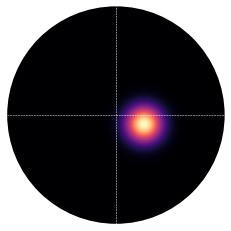

In [68]:
    # load design matrix
    design_fn = utils.get_file_from_substring("vis_design.mat", opj(base_dir, 'derivatives', 'prf', 'sub-005'))
    design_matrix = loadmat(design_fn)

    # load pRF-parameters
    vert_fn = utils.get_file_from_substring("best_vertices.csv", opj(base_dir, 'derivatives', 'pycortex', 'sub-005'))
    vert_info = utils.VertexInfo(infofile=vert_fn, subject=subject)
    params = vert_info.get('prf', hemi='lh')

    # plot pRF
    prf_stim = stimulus.PRFStimulus2D(screen_size_cm=70, screen_distance_cm=225, design_matrix=design_matrix['stim'],TR=1.5)
    prf_array = prf.make_prf(prf_stim, size=params[2], mu_x=params[0], mu_y=params[1])

    fn = opj(base_dir, 'derivatives', 'pycortex', 'sub-005', 'sub-005_hemi-L_desc-prf_position.pdf')
    print(fn)
    prf.plot_prf(prf_array, vf_extent=vf_extent, save_as=fn)